# Histogramas e KDE para diferentes grupos. Classifição são as classes. Regressão, binarizar a variável de saida para formar os grupos. Eventualmente variáveis que nao sejam continuas

## Definição de pronto

### Dados preparados no ambiente

## Definição de entregue

### Notebook fazendo a avaliação

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.precision", 4)

df_wine = pd.read_parquet("../../Data/Processed/wine/df_wine.parquet") 

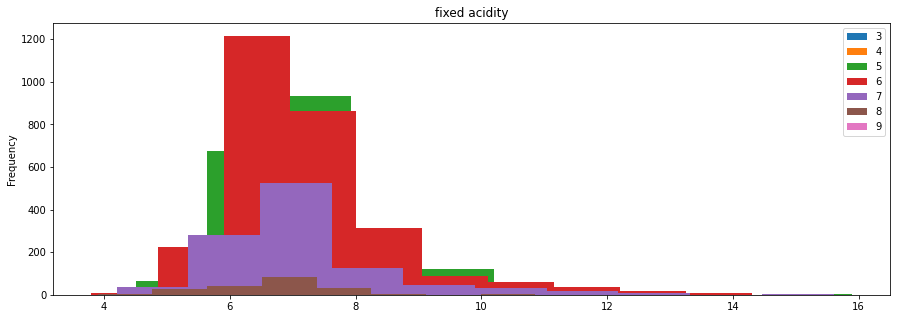

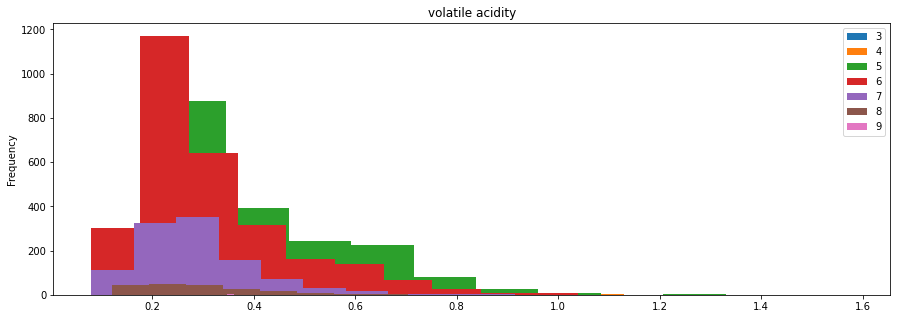

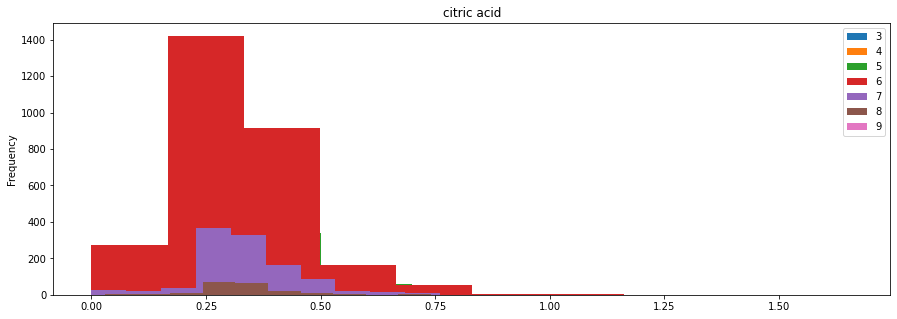

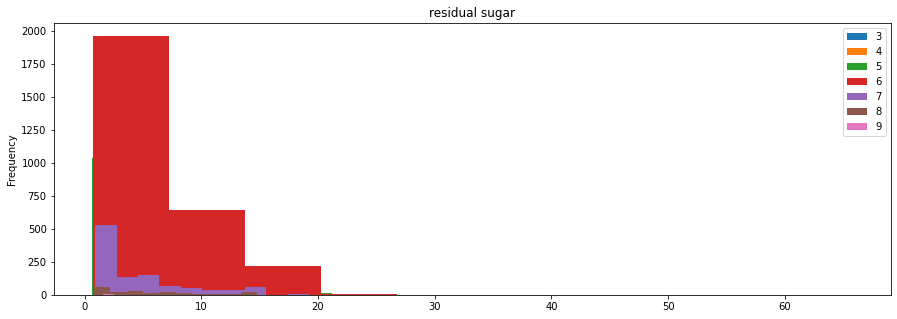

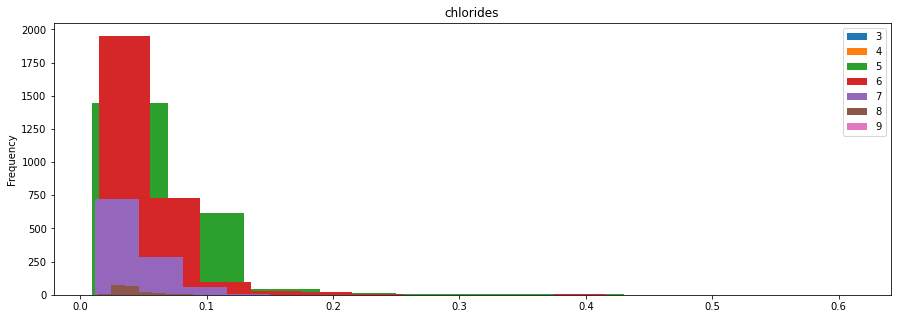

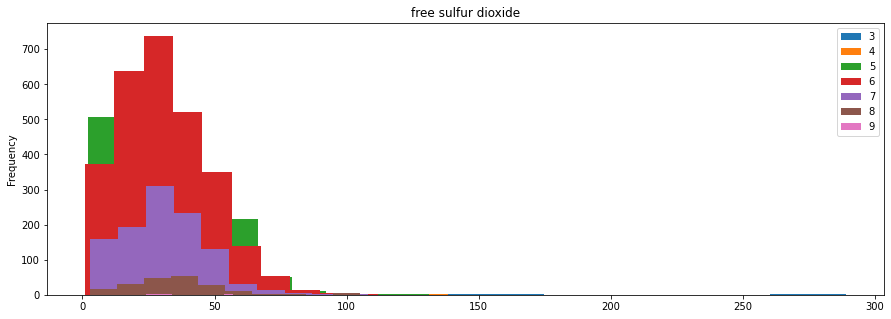

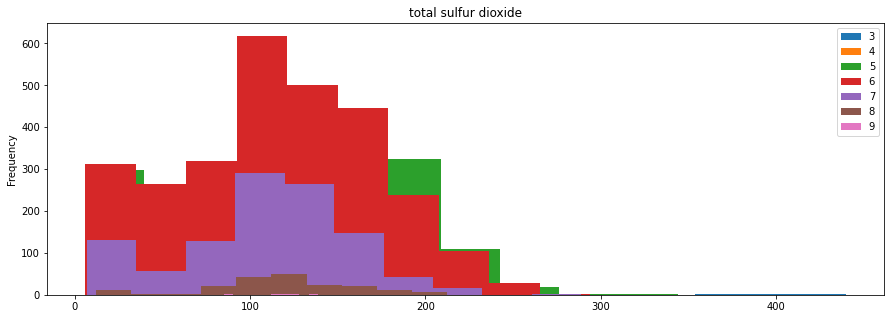

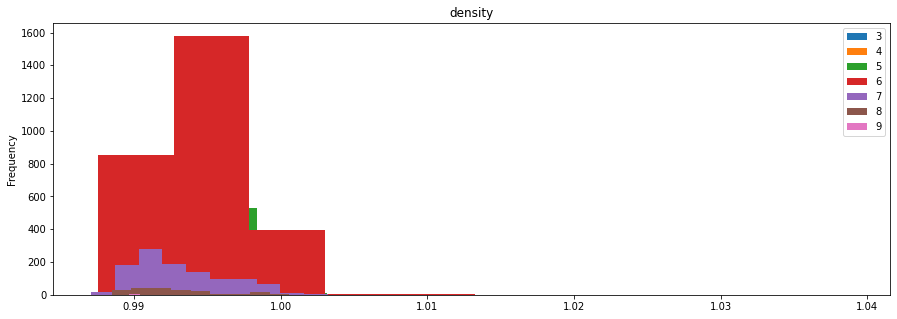

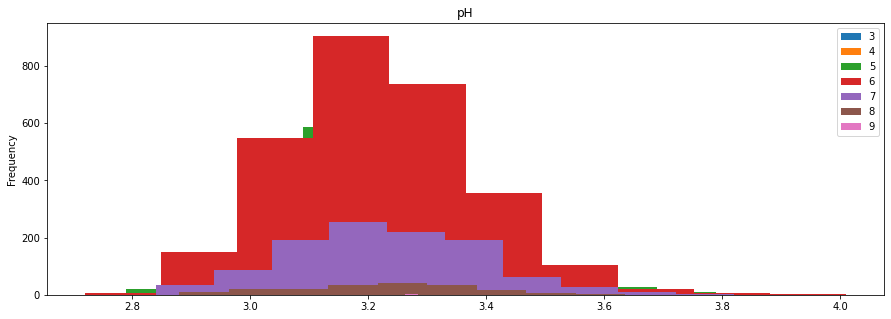

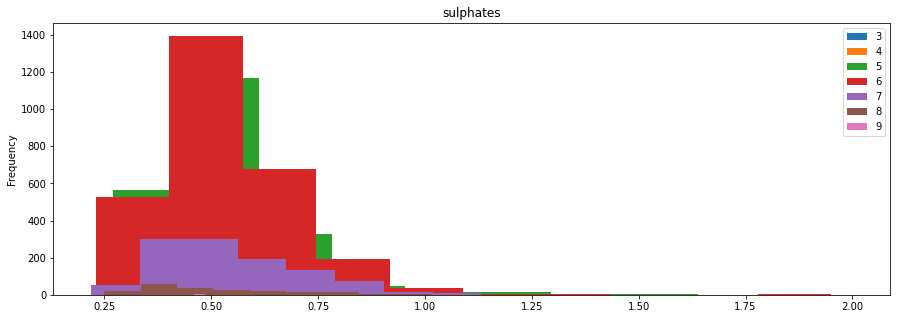

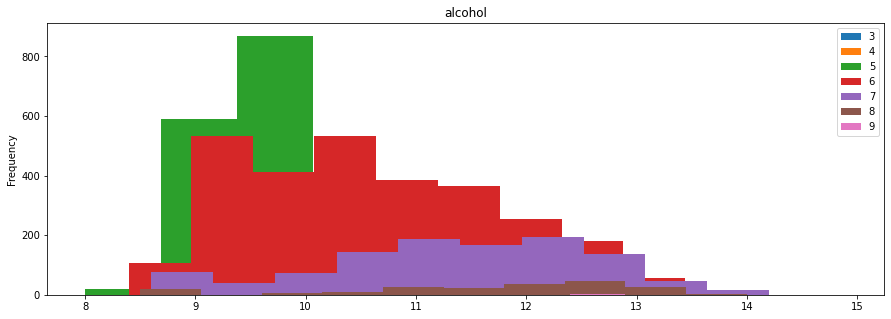

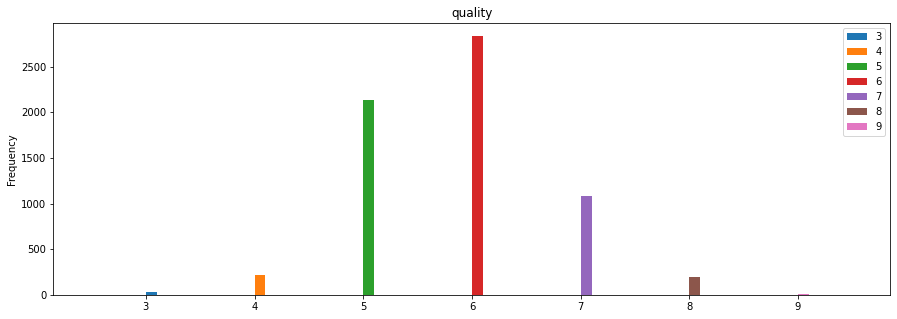

In [12]:
''' Histogramas para grupo Qualidade'''

''' Referência: https://matplotlib.org/gallery/index.html'''

for (column, _ ) in df_wine.drop(['type'], axis = 1).items():
    plt.figure()
    df_wine.groupby('quality')[column].plot.hist(figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

Essa análise parece fazer sentido já que a variável a ser agrupada tem poucos valores discretos. Além de ser a variável de interesse

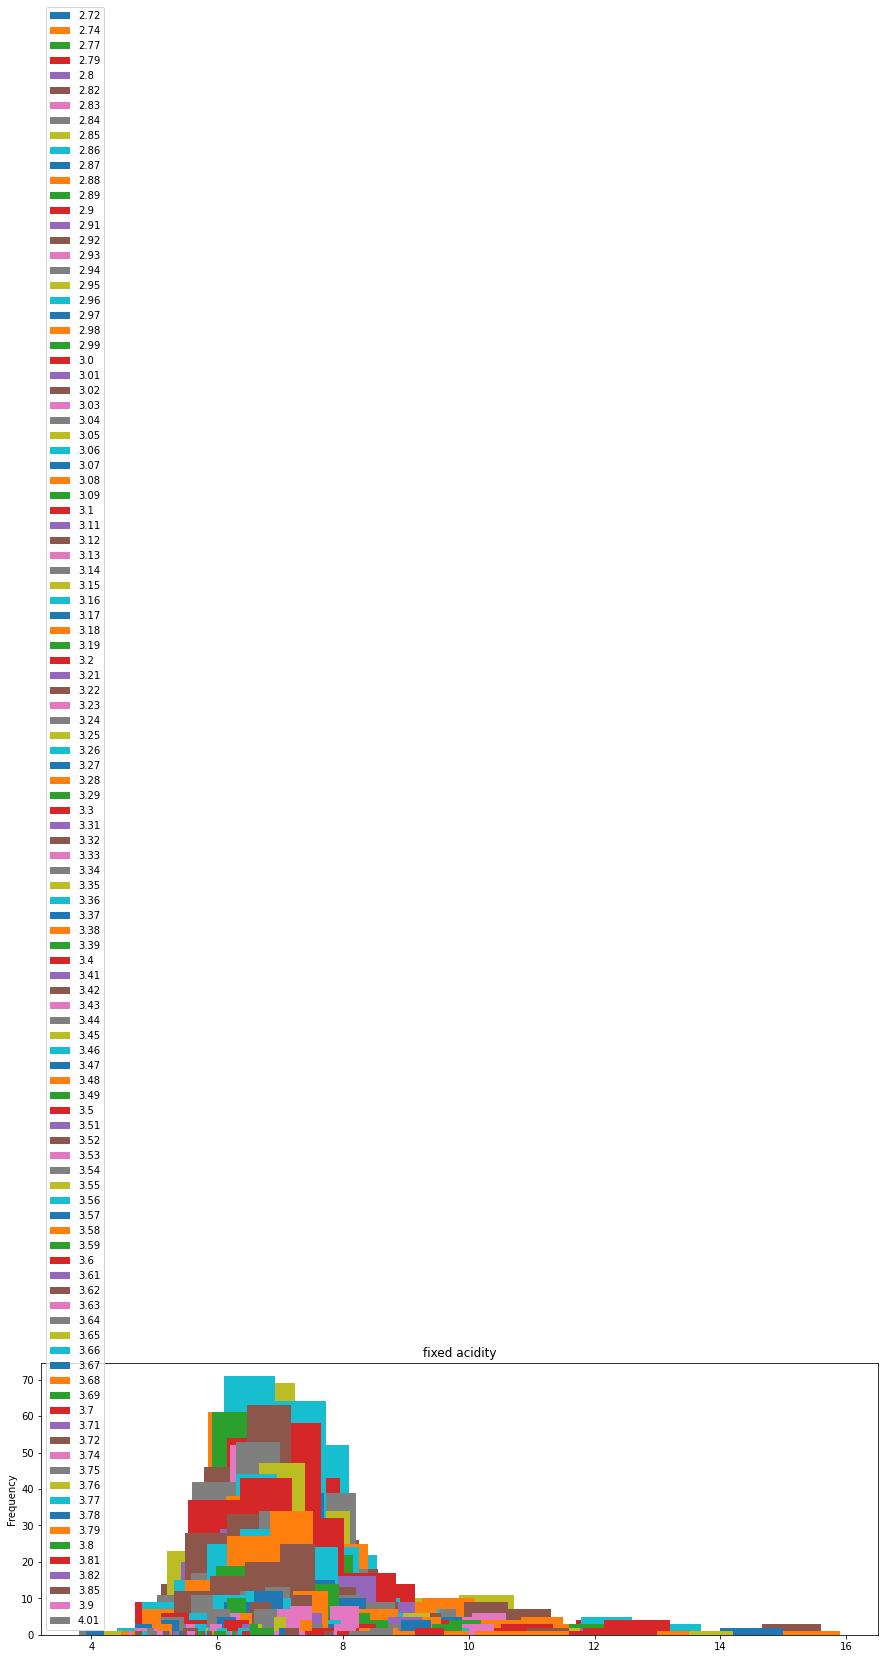

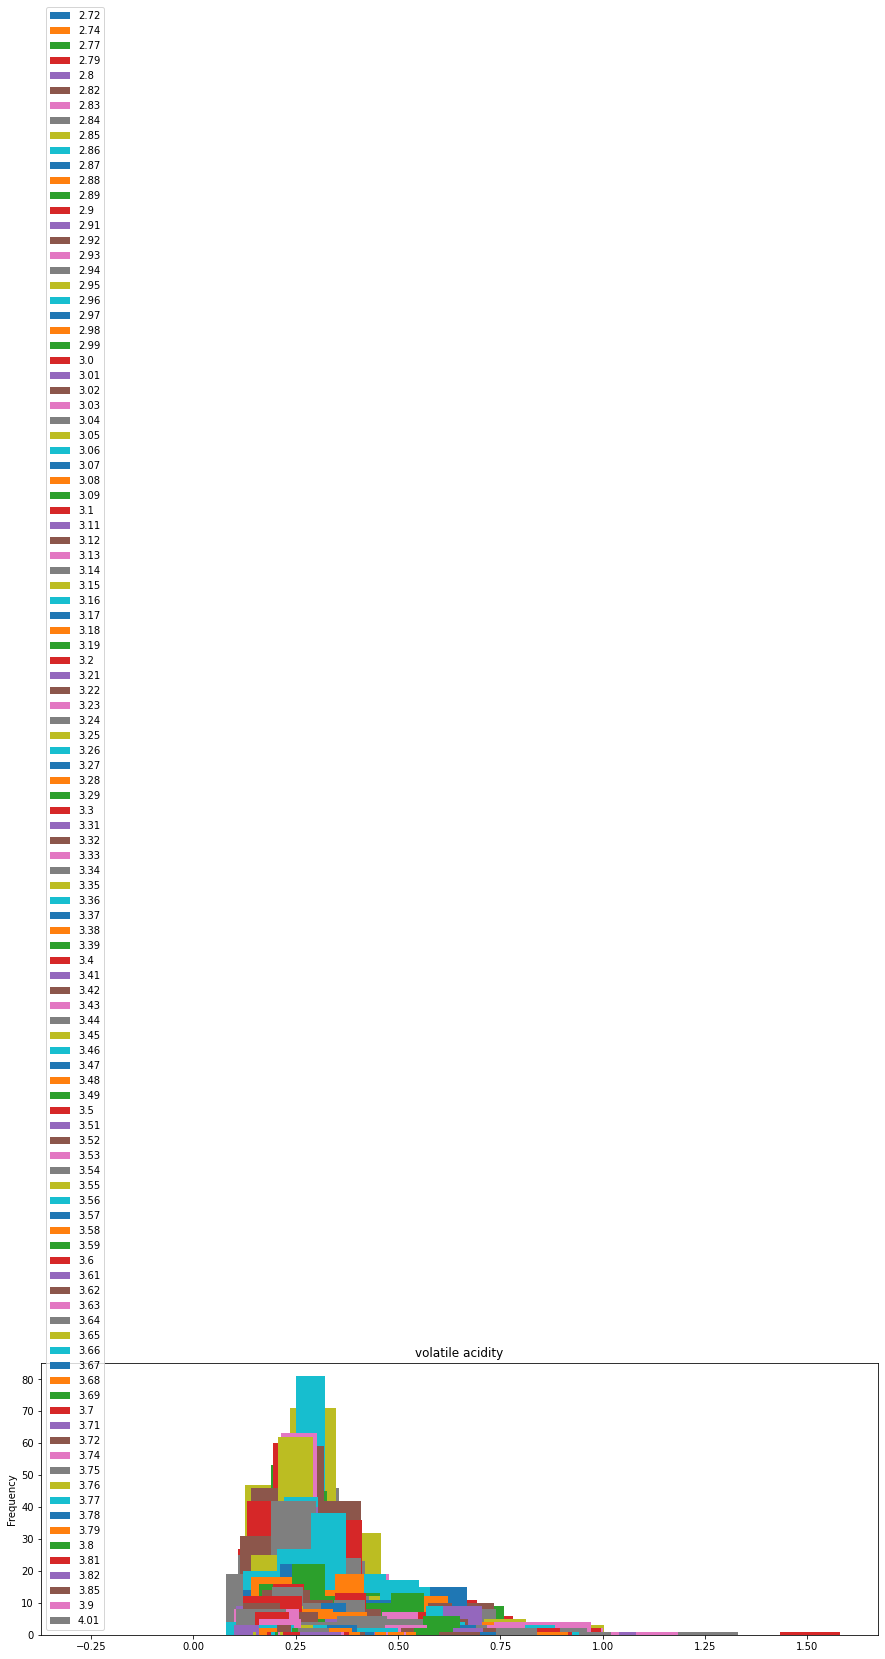

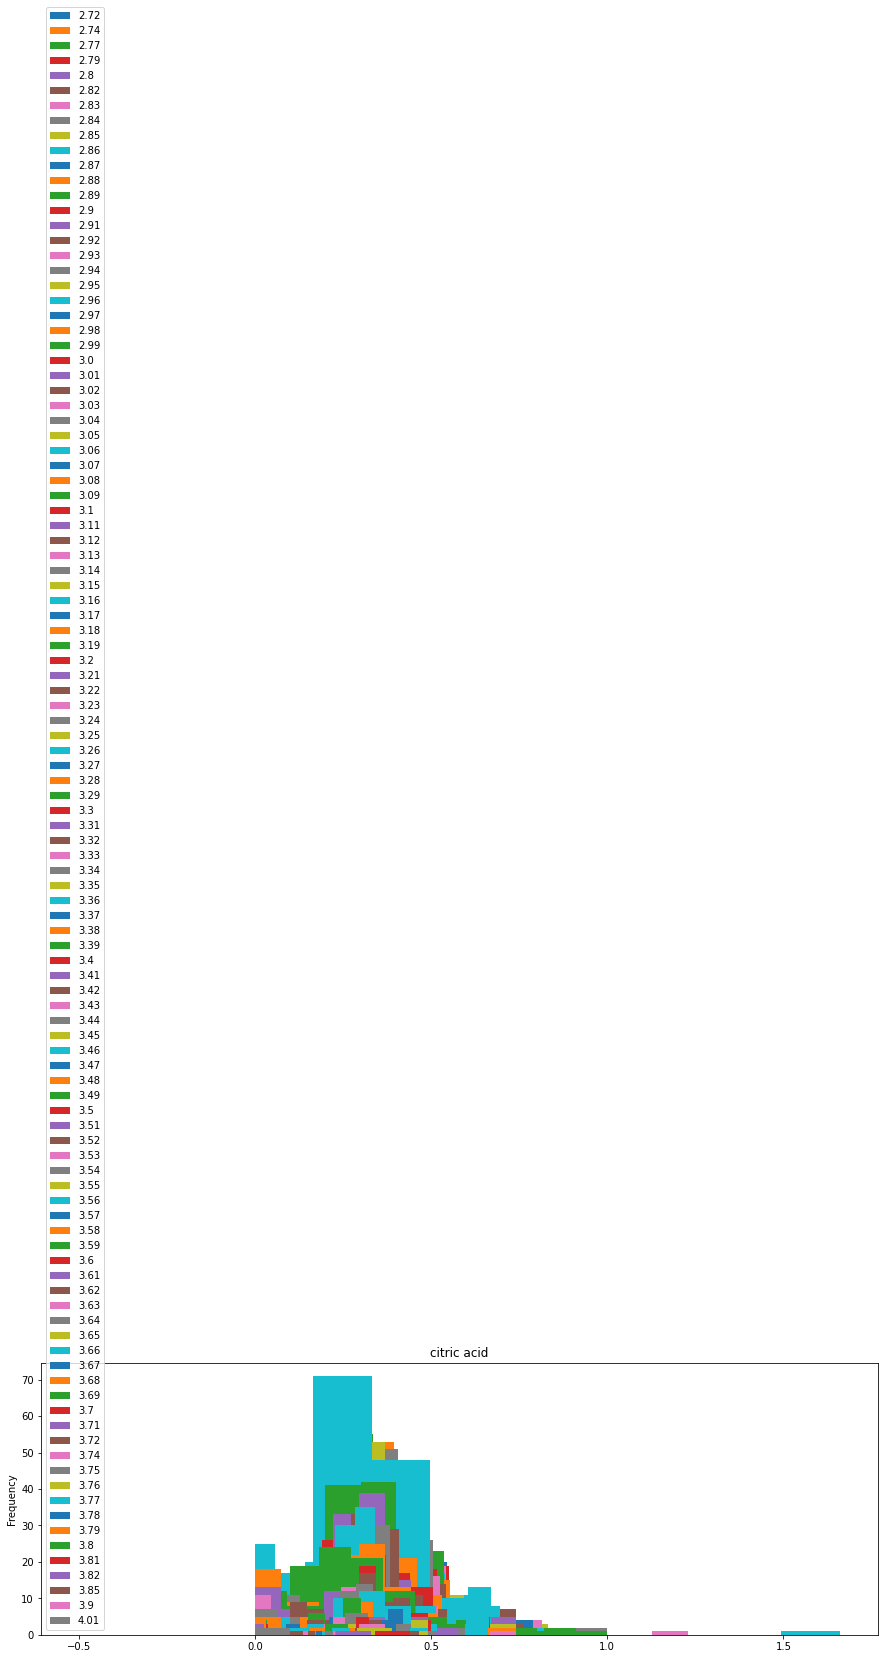

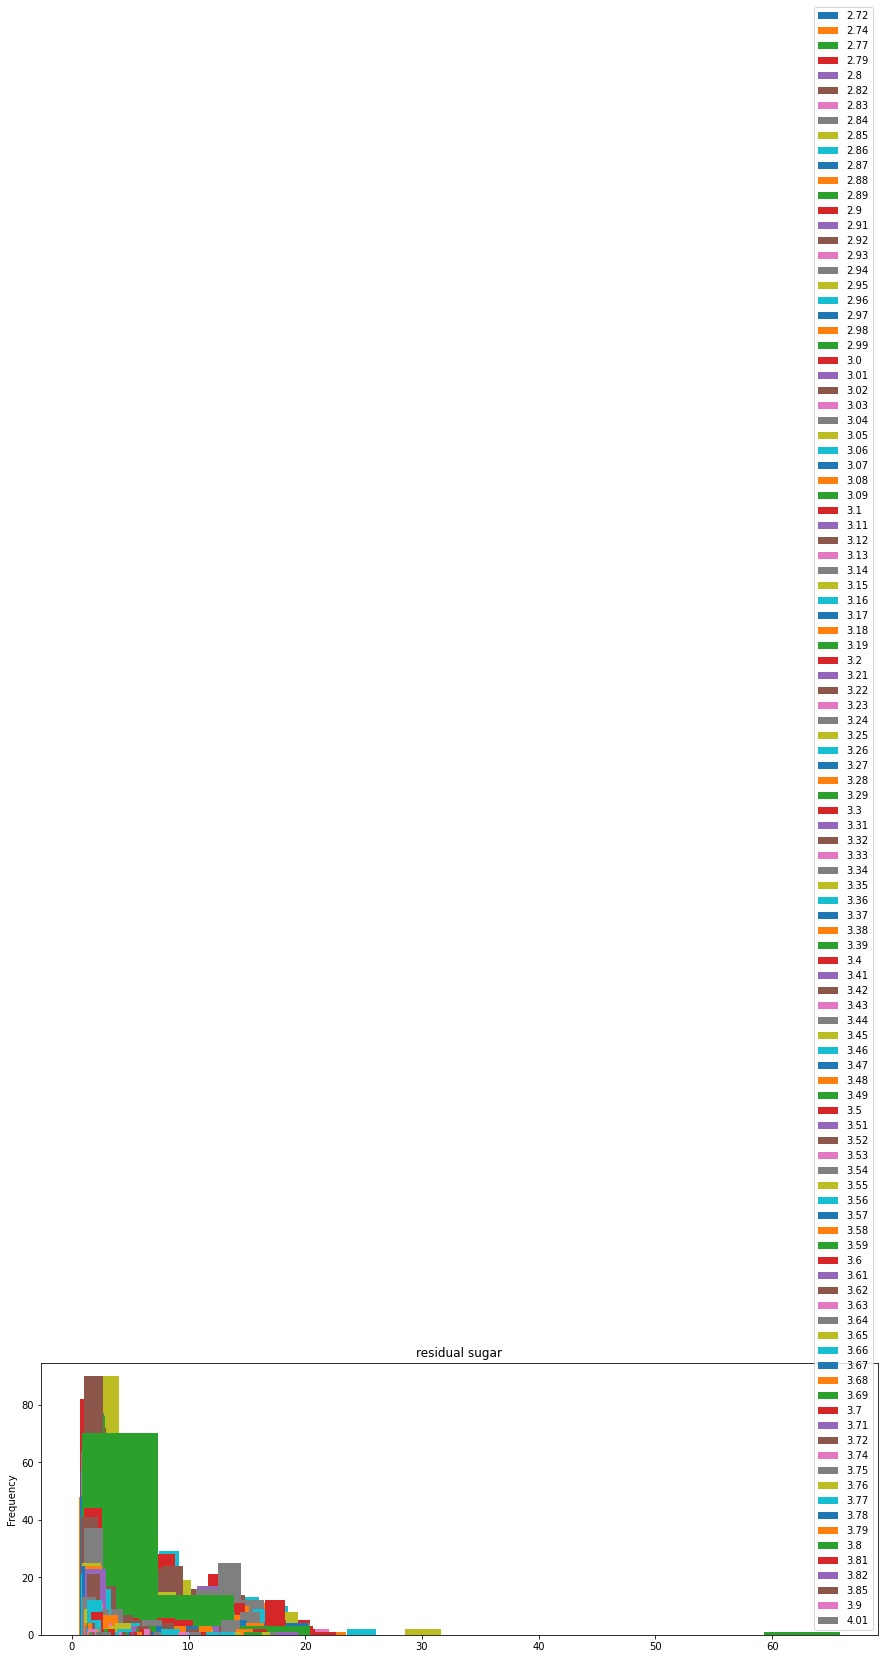

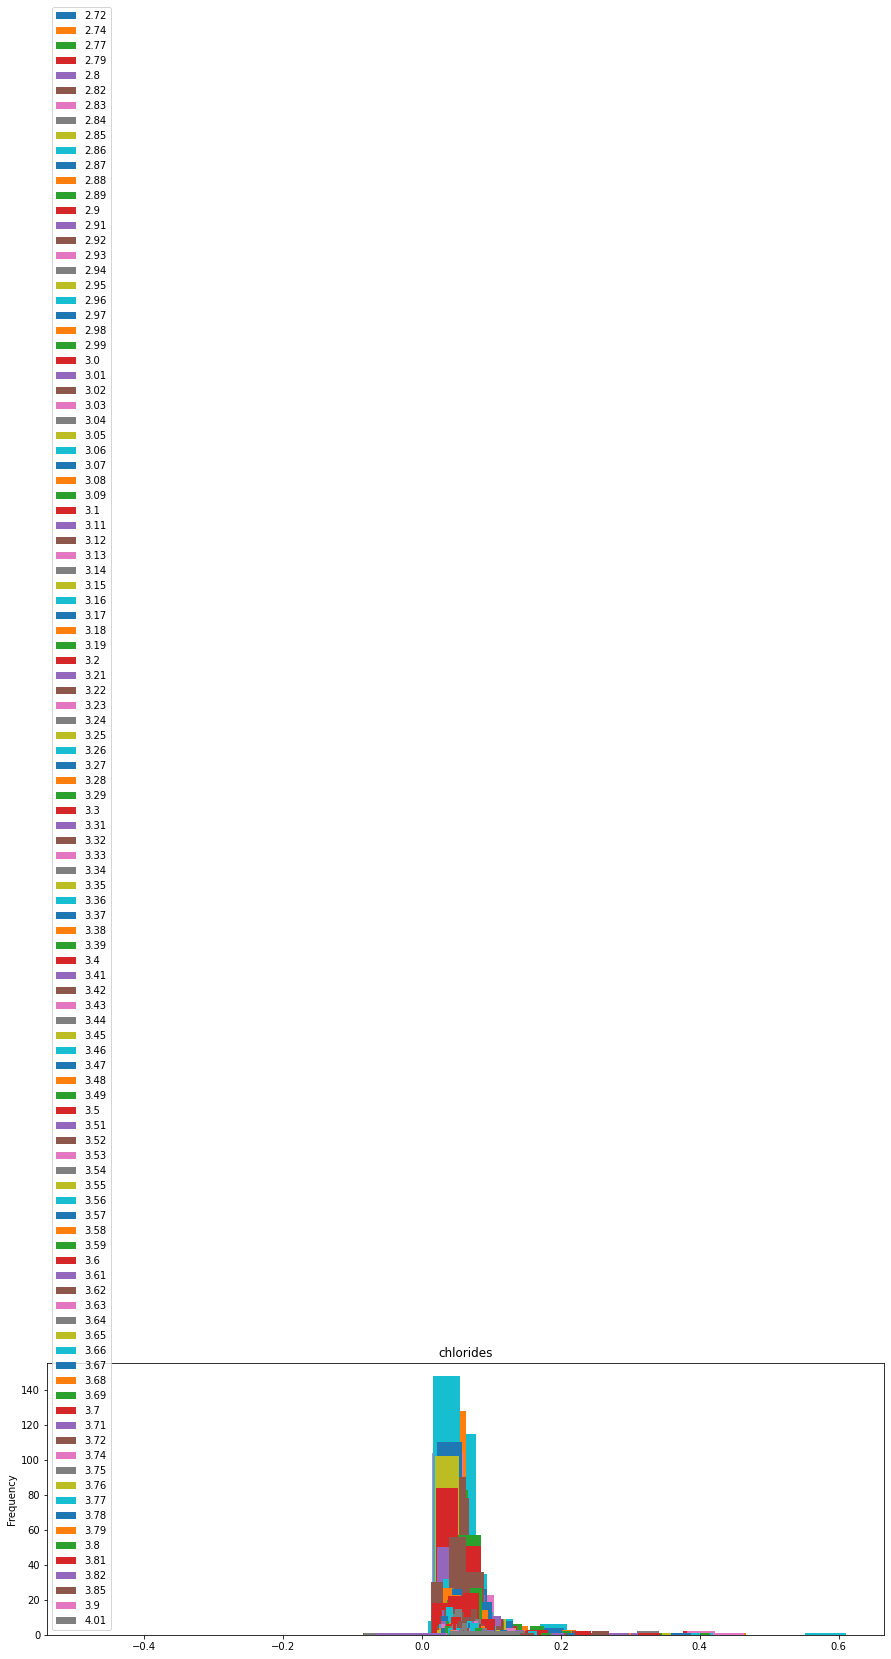

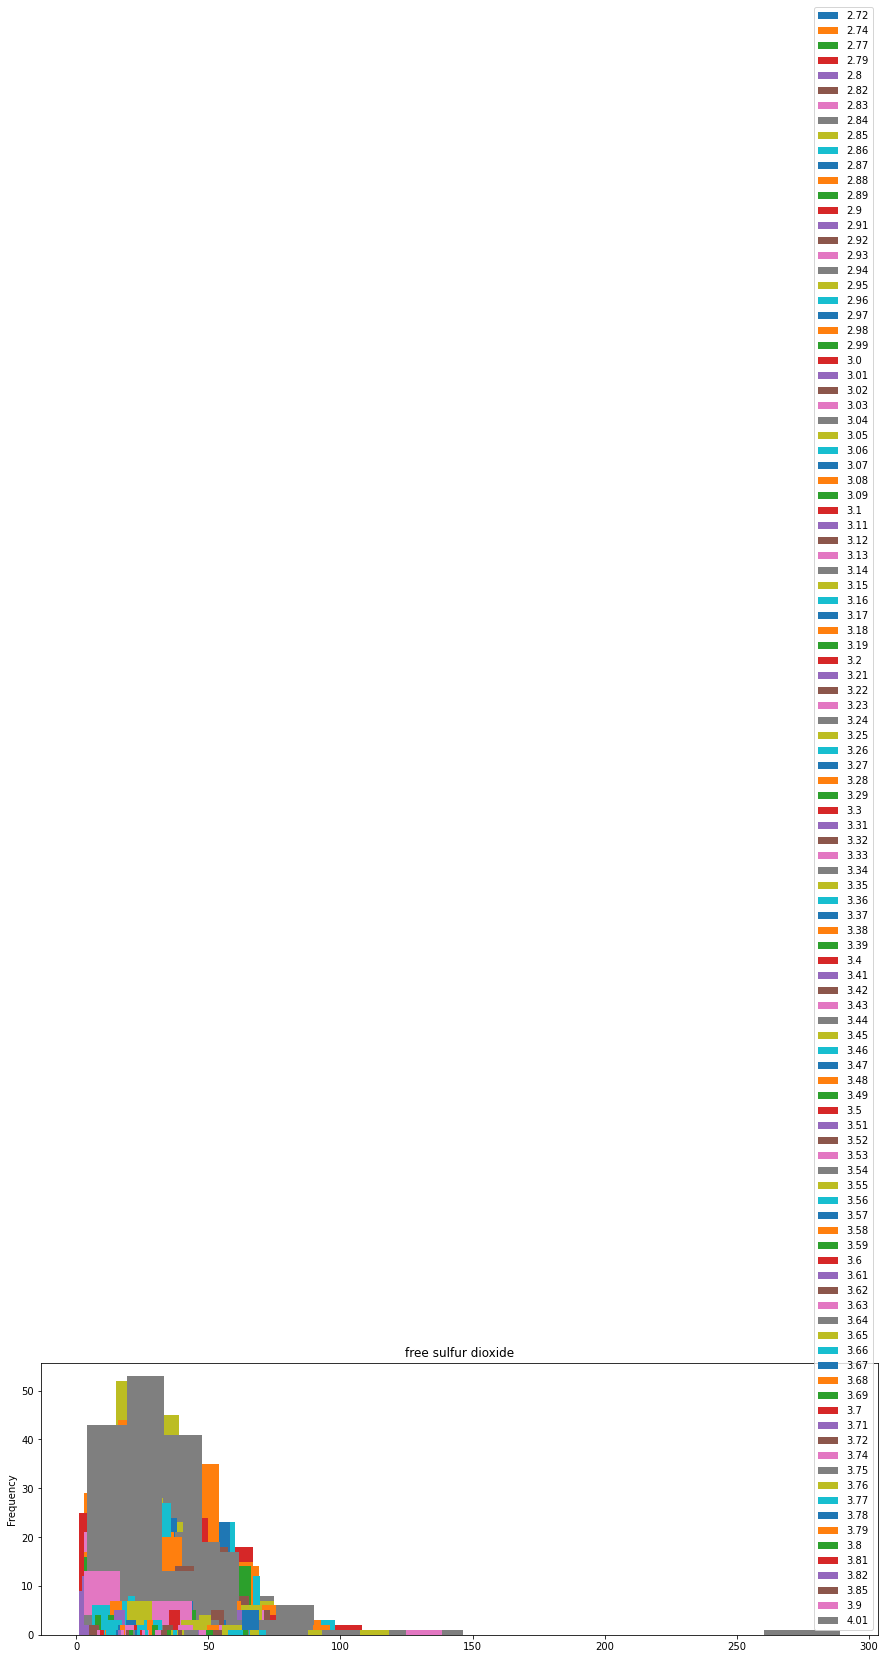

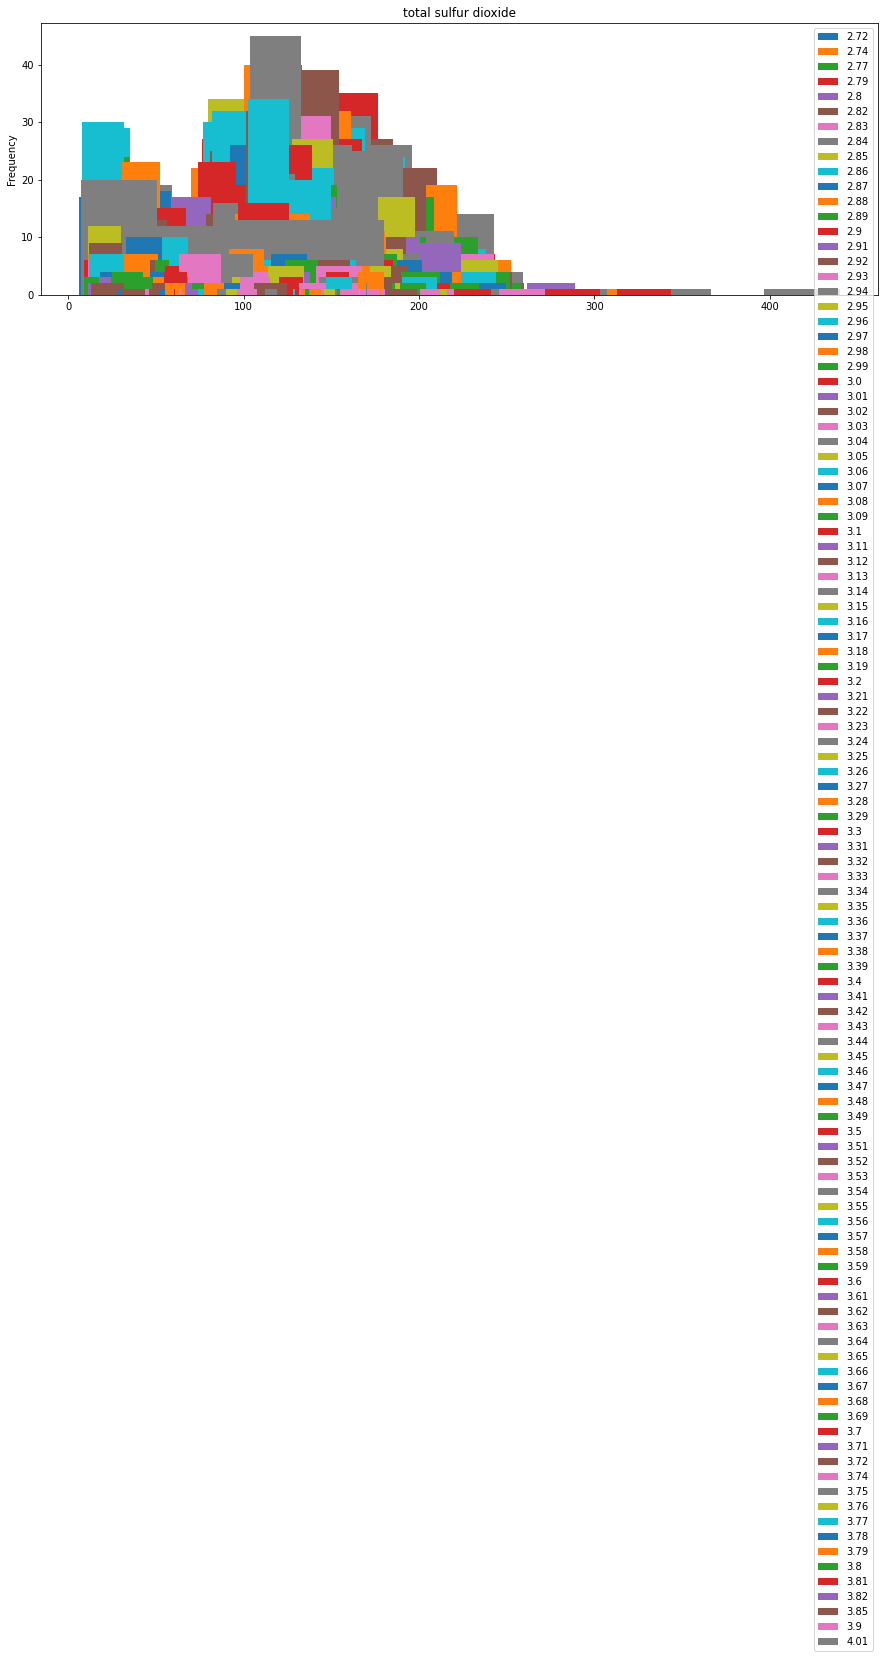

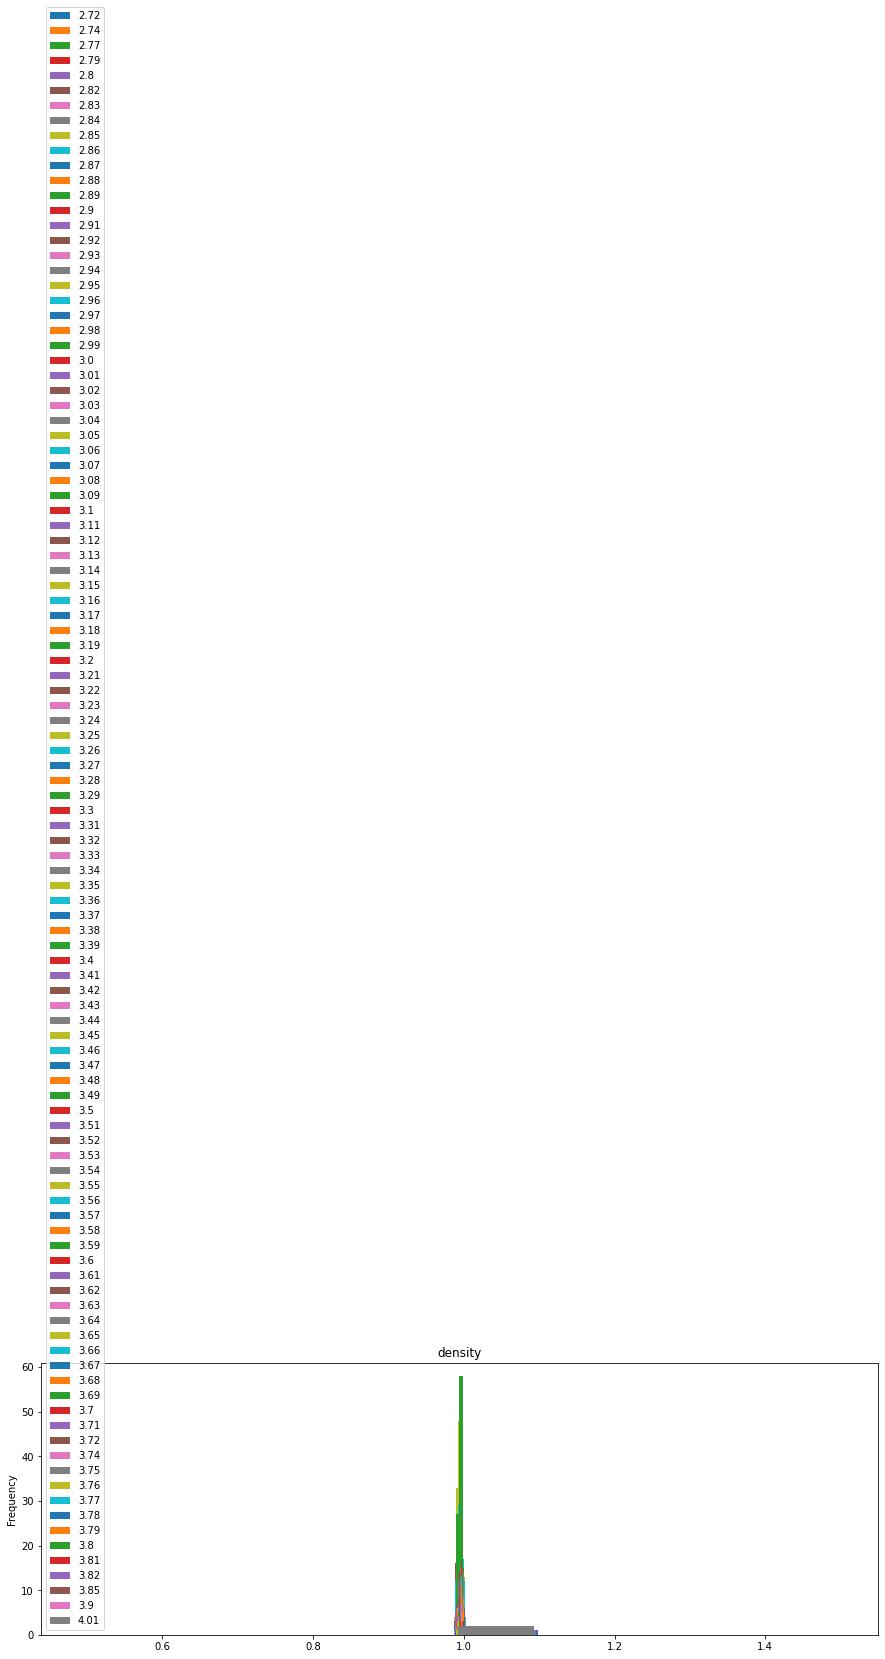

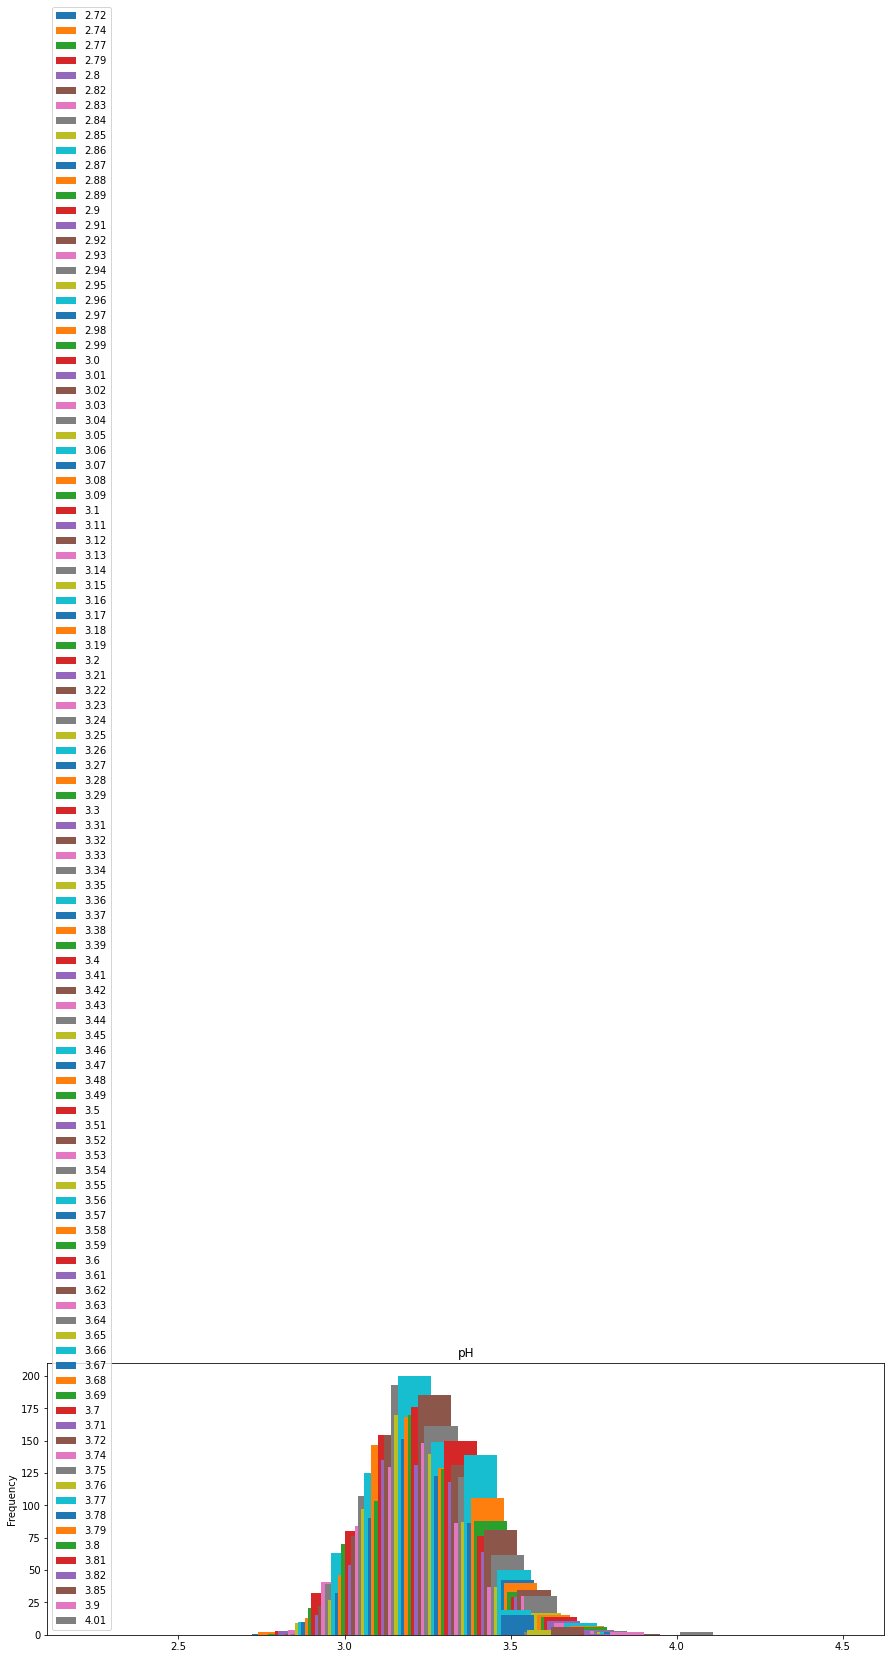

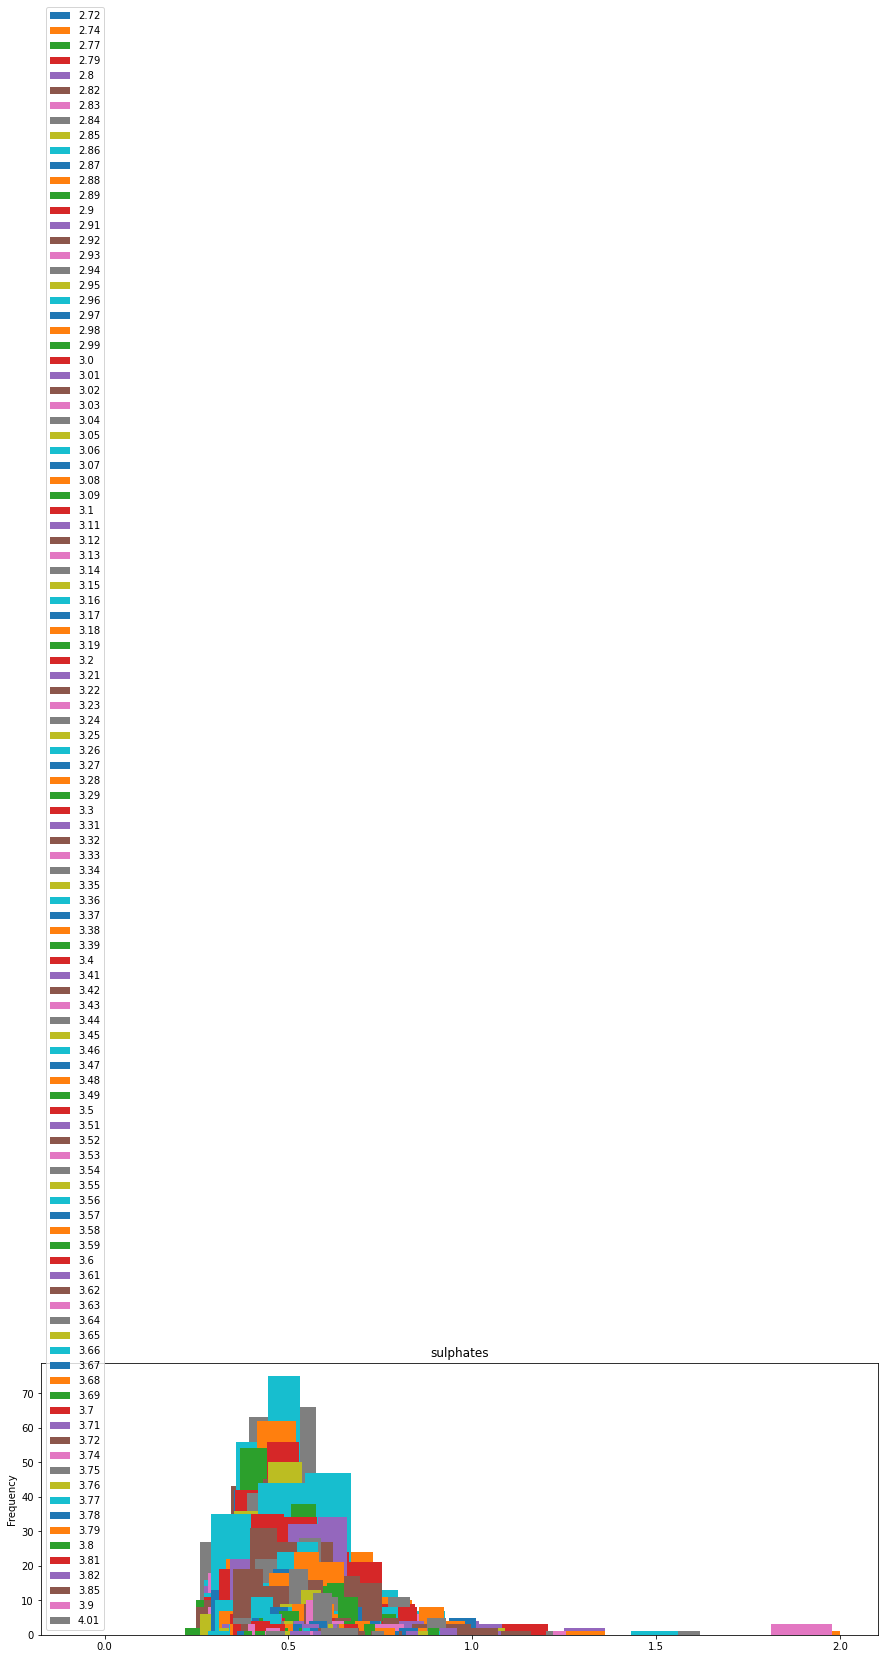

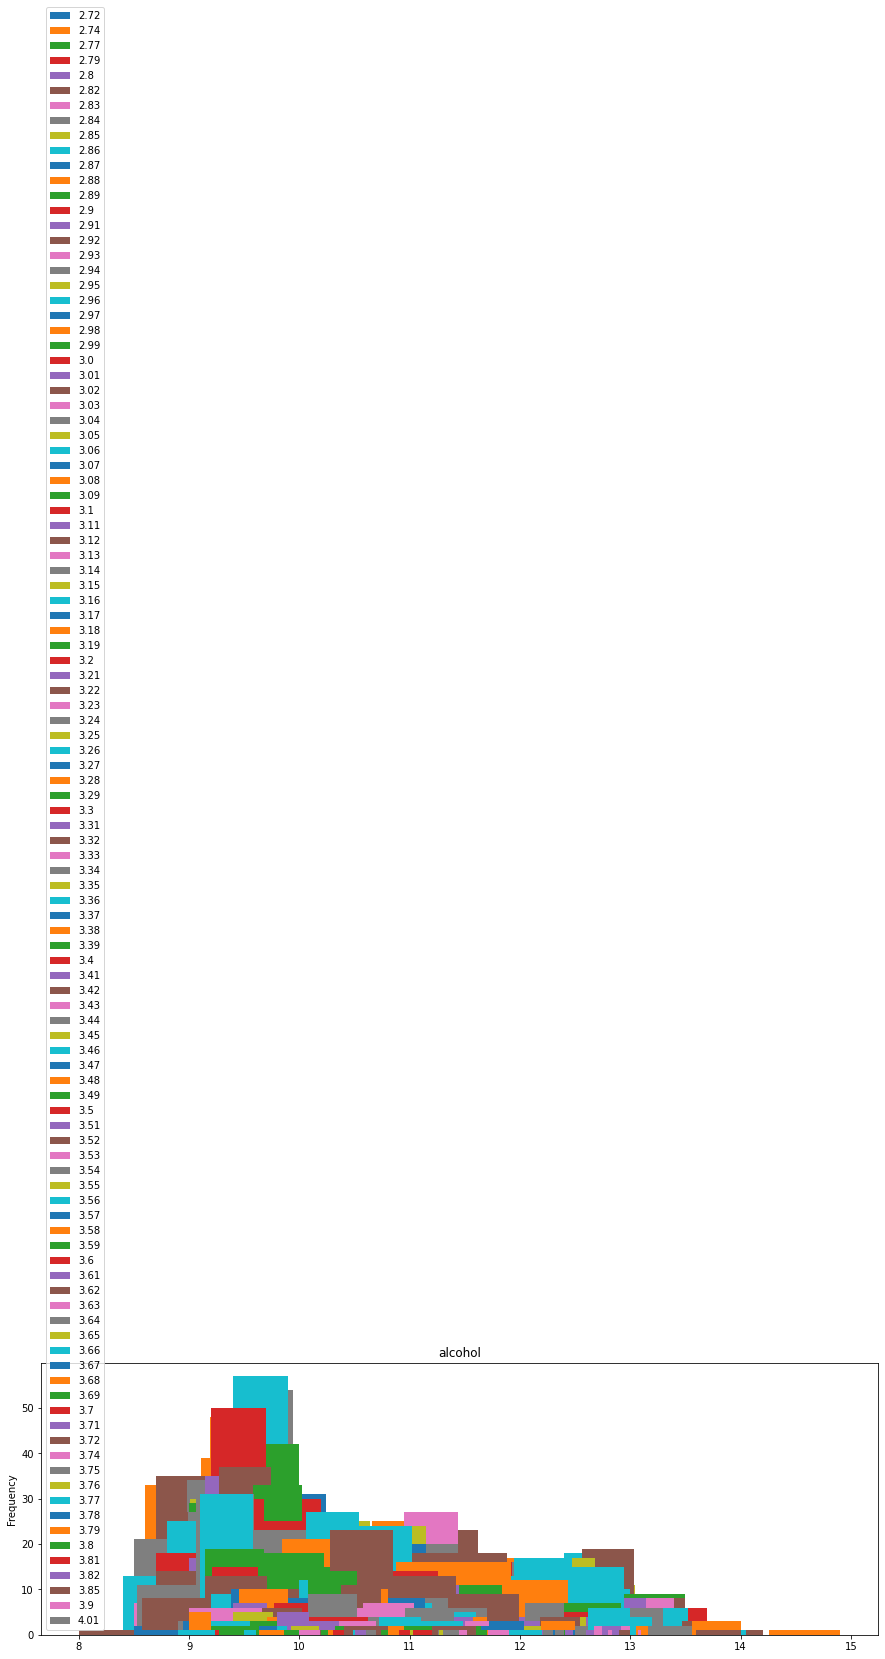

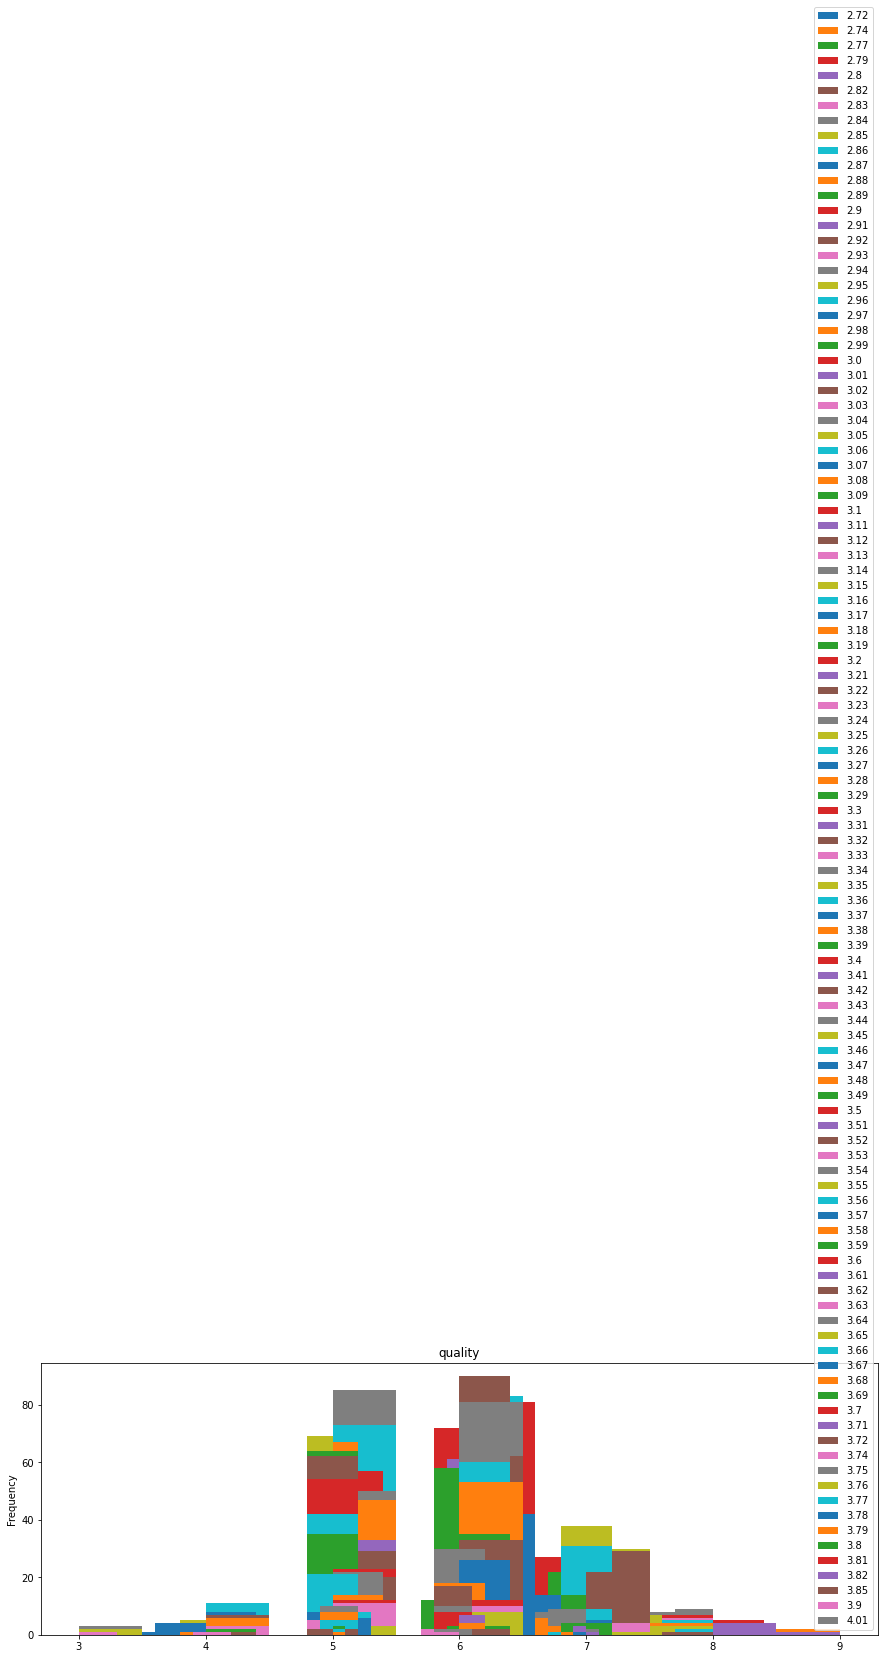

In [13]:
''' Histogramas para grupo pH'''

''' Referência: https://matplotlib.org/gallery/index.html'''

for (column, _ ) in df_wine.drop(['type'], axis = 1).items():
    plt.figure()
    df_wine.groupby('pH')[column].plot.hist(figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)

Essa análise já não parece fazer sentido já que a variável a ser agrupada tem característica de ser contínua.

Vamos discretizar a variável pH de acordo com o seu range dinâmico

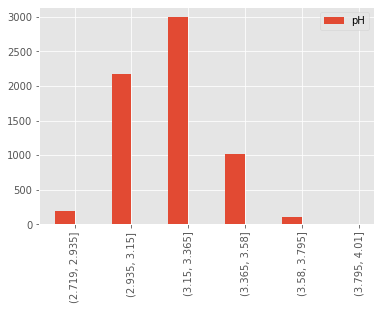

In [68]:
''' Histogramas para grupo pH discretizado em 6 categorias'''

''' Referência: https://matplotlib.org/gallery/index.html'''
'''             https://benalexkeen.com/bucketing-continuous-variables-in-pandas/'''


''' Gerando 6 bins ou buckets para os valores de pH'''
df_wine['pH'] = pd.cut(df_wine['pH'], 6)

plt.style.use('ggplot')

a = df_wine.groupby('pH').size()

categories = df_wine['pH'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, a, width, label='pH')

plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()


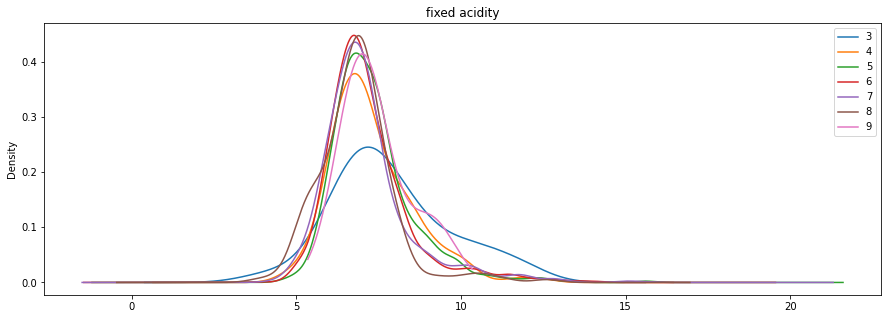

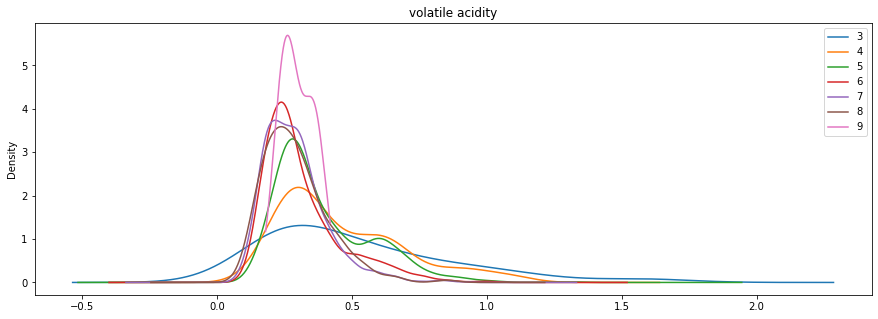

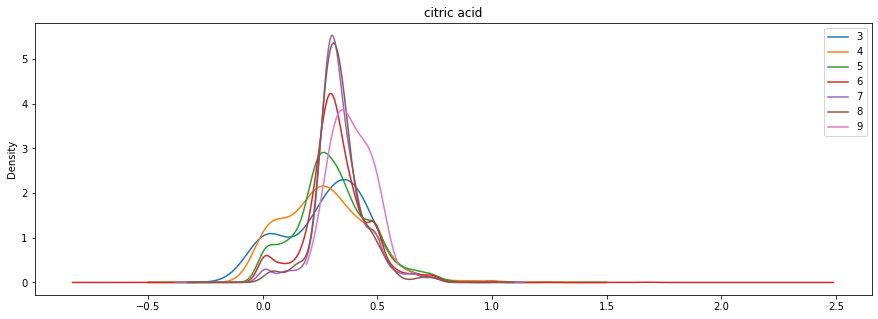

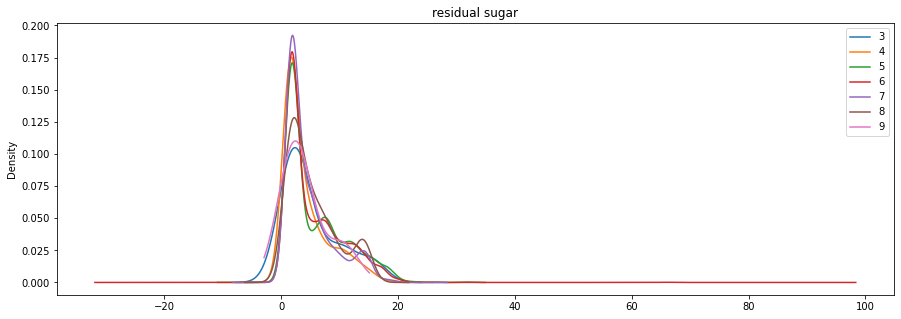

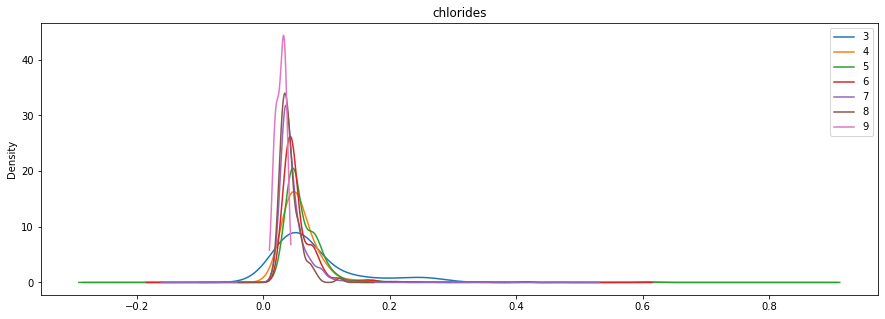

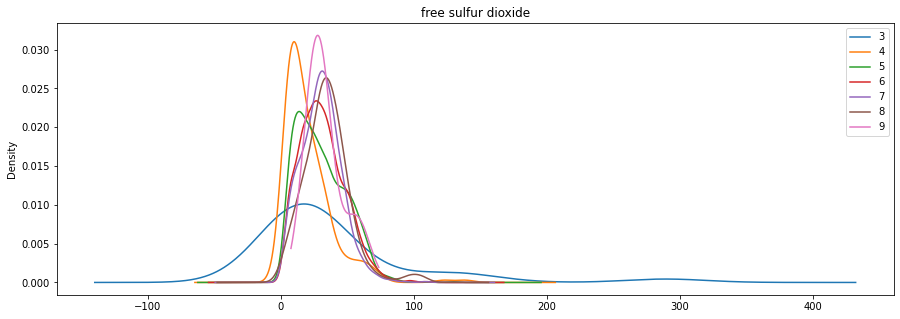

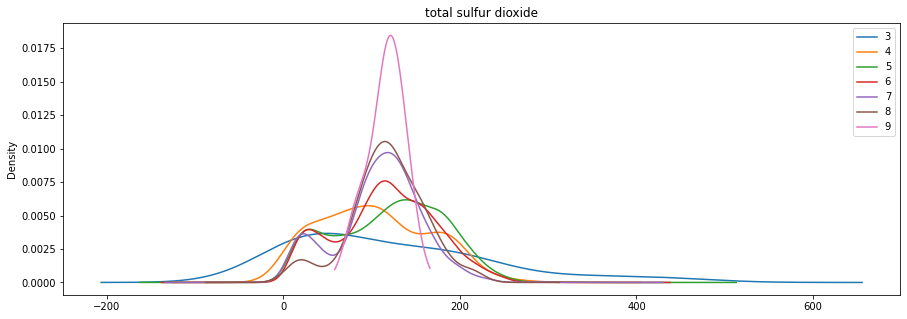

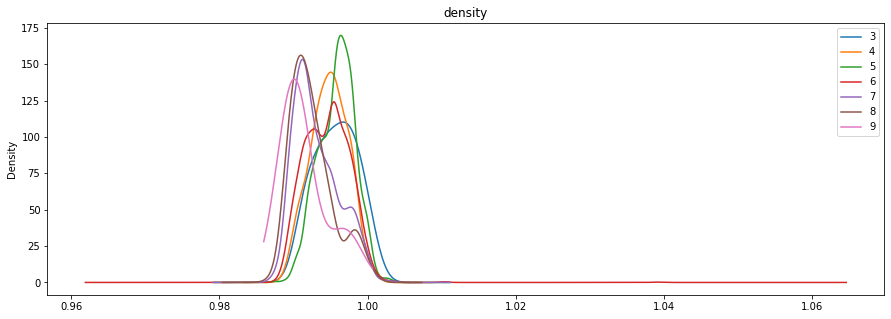

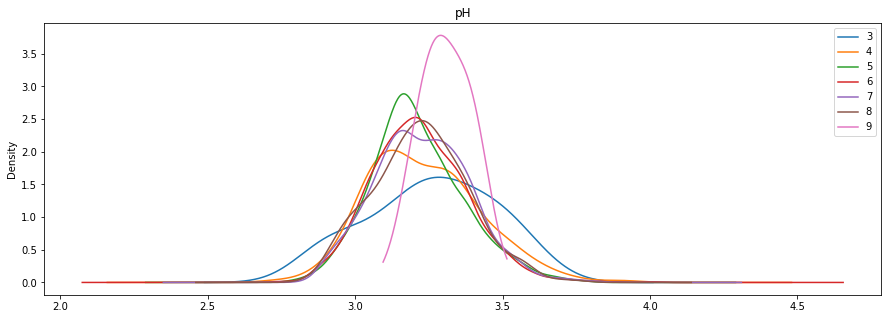

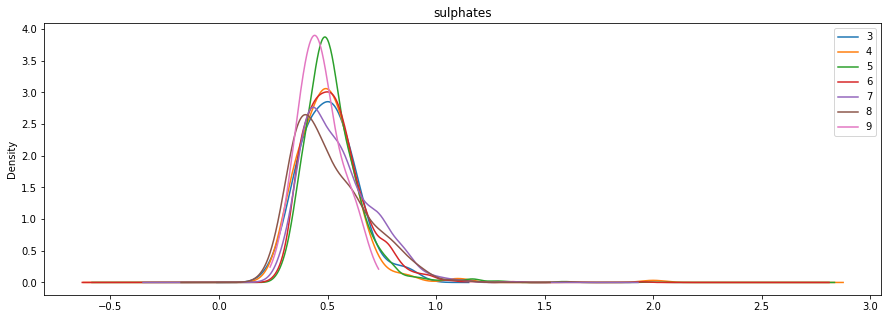

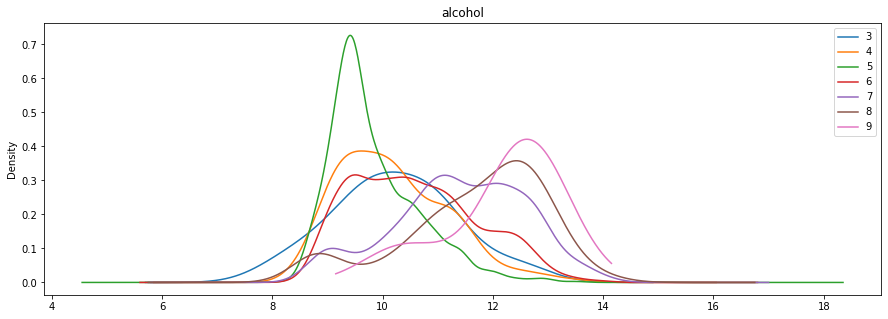

In [31]:
''' KDE para grupo Qualidade'''

''' Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html '''

''' Observação: A inclusão da coluna quality apresenta erro na geração do KDE quando confrontada consigo mesmo'''
  
for (column, _ ) in df_wine.drop(['type', 'quality'], axis = 1).items():
    plt.figure()
    df_wine.groupby('quality')[column].plot.kde(figsize=(15,5), legend=True);
    plt.legend(ncol = 1)
    plt.title(column)